# <center>Hotel booking demands of a city and a resort hotel in Portugal</center>
## <center>Kinan Jemil Hassen</center>

# Part I - (Dataset Exploration Title)
## by Kinan Jemil Hassen

## Introduction
> This data set contains booking information for a city hotel and a resort hotel. Both hotels are located in Portugal. The resort hotel is located in the resort region of Algarve and while the city hotel is in Lisbon. The dataset includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. The dataset can be found <a href="https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand">here.</a>
 
## Preliminary Wrangling


## Investigation 

The objective of this investigation is to conduct an exploratory data analysis on a dataset containing booking information for a city hotel and a resort hotel. Both hotels are located in Portugal. Various characteristics of the bookings such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things are included in the data. The time frame of the reservations included is between the 1st of July of 2015 and the 31st of August 2017. 

## Dataset Overview

The dataset contains 117430 hotel reservations with 25 features that give further details on the bookings. Arrival date, hotel type, total length of stay, average daily rates, and customer type are some of the main features included.

In [1]:
# In this section, all the packages deemed necessary for the data analysis process are imported.
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import datetime
from scipy import stats
import os
import glob
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
#Load the dataset
df_bookings = pd.read_csv('hotel_bookings.csv')

In [3]:
# Check to see if the data has been loaded properly.
df_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
#check the shape (rows & columns) of the dataset to have an idea of the size of data we are dealing with
df_bookings.shape

(119390, 32)

The dataset is composed of 119390 rows and 32 columns. 

In [5]:
# Next, I'll use the info() method to have an overview of the dataset.
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

It looks like the arrival date and reservation status date columns are in the wrong format. I'll change them to the correct data type which is the datetime data type. 'children' column is represented in float which deoesn't make sense. As far as missing values are concerned, only 'company' column seems to have a significant amount of null entries which I will have to deal with in the following cells.

In [6]:
# the following code is used to identify no of null values in each column.
df_bookings.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Again, this solidifies my finding earlier on where I found out that most columns have no null values. After visually assessing the dataset, I have decided to drop the two columns with significant amount of null entries which are the 'agent' and 'company' columns since they won't be of any use for the exploration task.

### Cleaning

I'll now convert the children column from float to integer.

In [7]:
# Since there are 4 rows with null entries under children column, I have to deal with them first before attempting to convert the data type of the column
df_bookings.children.isnull().sum()

4

In [8]:
df_bookings['children'].replace(np.nan, 0, inplace=True)

In [9]:
df_bookings.children.isnull().sum()

0

In [10]:
# Conversion of the children column to the appropriate data type
df_bookings['children'] = df_bookings['children'].astype(int)

In [11]:
df_bookings['children'].dtype

dtype('int32')

The data type of children column has been successfully changed to integer.

Next, I'll convert the date columns into the correct format and merge them into a single column.

In [12]:
df_bookings['arrival_date'] = pd.to_datetime(df_bookings['arrival_date_day_of_month'].astype(str) + df_bookings['arrival_date_month'].astype(str) + df_bookings['arrival_date_year'].astype(str) , format='%d%B%Y')

In [13]:
df_bookings.reservation_status_date = pd.to_datetime(df_bookings['reservation_status_date'])

In [14]:
df_bookings.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date'],
      dtype='object')

In [15]:
# I'll drop the columns that are duplicates and those that I consider to be insignificant for my analysis.
df_bookings.drop(['agent', 'company', 'distribution_channel', 'total_of_special_requests', 'required_car_parking_spaces', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'previous_bookings_not_canceled'], axis=1, inplace= True)

In [16]:
df_bookings.shape

(119390, 24)

24 columns remain after dropping the insignificant variables.

In the next cells, I'll rename some of the columns to make them more descriptive.

In [17]:
df_bookings = df_bookings.rename(columns={'adr': 'average_daily_rates'})

I'm also planning to add a new column which will include the length of stay. That can be done by adding the number of days in the columns 'stays_in_weekend_nights' and 'stays_in_week_nights'.

In [18]:
df_bookings['total_stay'] = df_bookings['stays_in_weekend_nights'] + df_bookings['stays_in_week_nights']

In [19]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   hotel                     119390 non-null  object        
 1   is_canceled               119390 non-null  int64         
 2   lead_time                 119390 non-null  int64         
 3   arrival_date_week_number  119390 non-null  int64         
 4   stays_in_weekend_nights   119390 non-null  int64         
 5   stays_in_week_nights      119390 non-null  int64         
 6   adults                    119390 non-null  int64         
 7   children                  119390 non-null  int32         
 8   babies                    119390 non-null  int64         
 9   meal                      119390 non-null  object        
 10  country                   118902 non-null  object        
 11  market_segment            119390 non-null  object        
 12  is

In [20]:
# We can also view statistical information about the data using the describe() method
df_bookings.describe()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,booking_changes,days_in_waiting_list,average_daily_rates,total_stay
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,27.165173,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.221124,2.321149,101.831122,3.427900
std,0.482918,106.863097,13.605138,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,0.652306,17.594721,50.535790,2.557439
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000
25%,0.000000,18.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,2.000000
50%,0.000000,69.000000,28.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,3.000000
75%,1.000000,160.000000,38.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,4.000000
max,1.000000,737.000000,53.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,21.000000,391.000000,5400.000000,69.000000


In [21]:
df_bookings.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'is_repeated_guest',
       'previous_cancellations', 'reserved_room_type', 'assigned_room_type',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'average_daily_rates', 'reservation_status',
       'reservation_status_date', 'arrival_date', 'total_stay'],
      dtype='object')

In [22]:
# I'll rearrange the columns for ease during analysis
# Rearrange the dataframe
cols = ['hotel', 'is_canceled', 'lead_time', 'arrival_date' ,'arrival_date_week_number', 
        'stays_in_weekend_nights', 'stays_in_week_nights', 'total_stay','adults', 'children',  
        'babies', 'meal', 'country', 'market_segment', 'is_repeated_guest',
        'previous_cancellations', 'reserved_room_type', 'assigned_room_type',
        'booking_changes', 'deposit_type', 'days_in_waiting_list',
        'customer_type', 'average_daily_rates', 'reservation_status',
        'reservation_status_date']
df_bookings = df_bookings[cols]

In [23]:
#Check if the above operation has been performed properly
df_bookings.sample(3)

,hotel,is_canceled,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,total_stay,adults,children,...,previous_cancellations,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,average_daily_rates,reservation_status,reservation_status_date
90596,City Hotel,0,118,2016-06-06,24,1,2,3,1,0,...,0,A,D,0,No Deposit,0,Transient-Party,110.0,Check-Out,2016-06-09
4025,Resort Hotel,1,112,2016-02-12,7,0,2,2,2,0,...,0,A,A,0,No Deposit,0,Transient-Party,68.0,Canceled,2016-02-05
59455,City Hotel,1,245,2016-10-28,44,1,2,3,3,0,...,0,A,A,0,No Deposit,0,Transient,128.7,Canceled,2016-07-11


After looking at the statistical information, I noticed that the minimum value for the 'adr' (average daily rate) column is -6. This is likely to be an error during the insertion of the data. Another thing is, the value 737 under the column 'lead_time' is an extreme outlier. 

In [24]:
# Include only the rates that are greater than 0
df_bookings = df_bookings[df_bookings['average_daily_rates'] > 0]

In [25]:
df_bookings['average_daily_rates'].describe()

count    117430.000000
mean        103.530818
std          49.198721
min           0.260000
25%          70.530000
50%          95.000000
75%         126.000000
max        5400.000000
Name: average_daily_rates, dtype: float64

In [26]:
# high-level overview of data shape and composition after wrangling
print('Shape:{}\n'.format(df_bookings.shape))
print(df_bookings.info())
print()
df_bookings.head()

Shape:(117430, 25)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117430 entries, 2 to 119389
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   hotel                     117430 non-null  object        
 1   is_canceled               117430 non-null  int64         
 2   lead_time                 117430 non-null  int64         
 3   arrival_date              117430 non-null  datetime64[ns]
 4   arrival_date_week_number  117430 non-null  int64         
 5   stays_in_weekend_nights   117430 non-null  int64         
 6   stays_in_week_nights      117430 non-null  int64         
 7   total_stay                117430 non-null  int64         
 8   adults                    117430 non-null  int64         
 9   children                  117430 non-null  int32         
 10  babies                    117430 non-null  int64         
 11  meal                      117430 non-null  ob

,hotel,is_canceled,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,total_stay,adults,children,...,previous_cancellations,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,average_daily_rates,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015-07-01,27,0,1,1,1,0,...,0,A,C,0,No Deposit,0,Transient,75.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,27,0,1,1,1,0,...,0,A,A,0,No Deposit,0,Transient,75.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,27,0,2,2,2,0,...,0,A,A,0,No Deposit,0,Transient,98.0,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015-07-01,27,0,2,2,2,0,...,0,A,A,0,No Deposit,0,Transient,98.0,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015-07-01,27,0,2,2,2,0,...,0,C,C,0,No Deposit,0,Transient,107.0,Check-Out,2015-07-03


This concludes the data wrangling section. After performing some cleaning operations, the dataset seems quite clean and ready to work with. There are 117430 rows and 25 columns.

### What is the structure of your dataset?

> The dataset contains 117430 hotel reservations with 25 features that give further details on the bookings. 

### What is/are the main feature(s) of interest in your dataset?

> A lot can be done with this dataset to gain useful insights. I'm really interested to find out the time of the year with the most reservations. Are the hotels more busy during certain times of the year? Is there a surge in reservations during certain seasons? I'm also looking to explore if the rates of the hotels affect the length of stay. Another thing I'm curious about is the average length of stay categorized by the hotel types and customer types. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The <strong>arrival_date</strong> feature is crucial to identify the most popular time of the year for reservations. With regards to exploring the correlation between length of stay and hotel rates, <strong>total_stay</strong> and <strong>average_daily_rates</strong> will be quite helpful. <strong>hotel</strong> and <strong>customer_type</strong> columns are also essential to explore the length of stay in the 2 types of hotels. 

## Univariate Exploration

Before exploring the main features of interest I stated above, I'll have a look at some of the other features to have a detailed idea of the structure of the data. I'll start from the categorical variables.

First, I'll look into the categorization based on the hotel type. The data comprises of two types of hotels, resort and city hotels. 

I'll create a pie chart plotter function since I'll be plotiing the pie chart for 2-3 different features.

In [131]:
#function to plot pie chart
def pie_plot(data, labels, title, explode):
    plt.style.use('ggplot')
    plt.title(title,  fontsize=20, y=1.05)
    plt.pie(data, labels=labels, autopct='%.2f%%', explode=explode, shadow = True,
         startangle=90, textprops={'fontsize': 14})
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    rcParams['font.size'] = 20
    rcParams['figure.figsize'] = 16,8
    plt.show()
    

In [28]:
hotel_data = df_bookings['hotel'].value_counts()

## Classification by hotel types

As mentioned earlier during the dataset introduction, booking information for a city hotel and a resort hotel are included in this dataset. Both hotels are located in Portugal. The resort hotel is located in the resort region of Algarve and while the city hotel is in Lisbon. City hotels made up close to 2/3 of the data which is around 66.5% while resort hotels were 33.5% of the reservations.

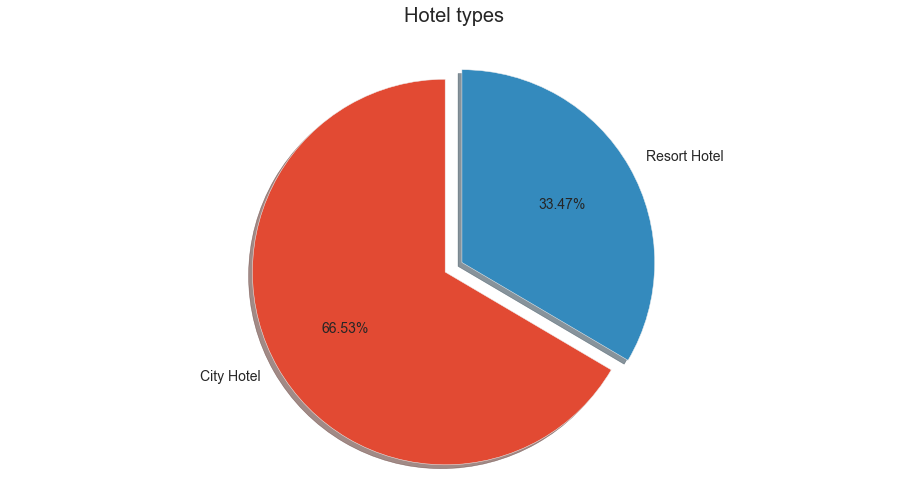

In [135]:
#Percentage of Resort and City hotel types
pie_plot(hotel_data, ['City Hotel', 'Resort Hotel'], 'Hotel types', (0.1, 0))

Based on the figure above, majority of the reservations in this dataset are in favour of city hotels which is around two thirds of the data. 

Next, I'll check what percentage of guests are returning.

In [30]:
returning_guests_data = df_bookings['is_repeated_guest'].value_counts()

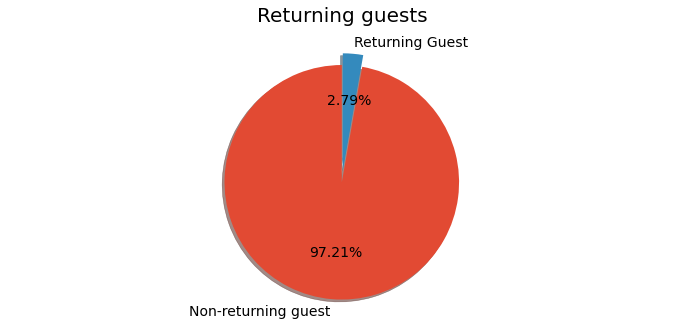

In [31]:
# Percentage of cancelled reservations
pie_plot(returning_guests_data, ['Non-returning guest', 'Returning Guest'], 'Returning guests', (0.1, 0))

Only 2.8% of the guests are returning guests.

I'll then check the total number of reservations categorizing them by the year they were booked.

In [32]:
#function to plot countplot 
def count_plot(data, title, y_label, x_label, fig_size):
    base_color = sns.color_palette()[0]
    sns.countplot(data, color = base_color)
    plt.title(title, fontsize=22, y=1.01)
    plt.ylabel(y_label, fontsize=16)
    plt.xlabel(x_label, fontsize=16)
    plt.xticks(rotation='vertical', fontsize=13)
    plt.yticks(fontsize=14)
    sns.set(rc = {'figure.figsize': fig_size})
    # plt.savefig('reservations_per_year.png')
    plt.show()

In [33]:
arrival_date_year = df_bookings['arrival_date'].dt.year
arrival_date_year.value_counts()

2016    55789
2017    40231
2015    21410
Name: arrival_date, dtype: int64

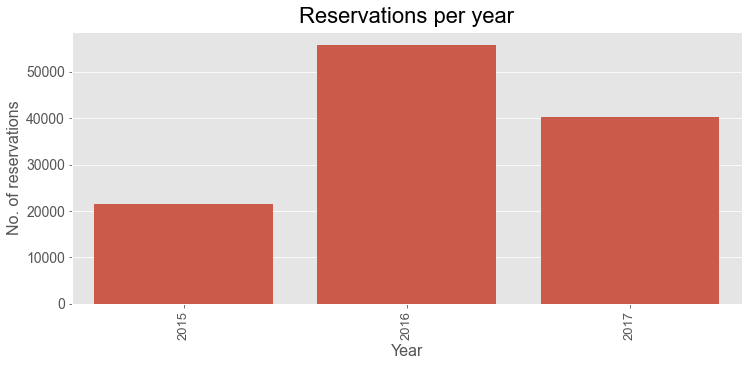

In [34]:
# Hotel reservations categorized by year
arrival_date_year = df_bookings['arrival_date'].dt.year
count_plot(arrival_date_year, 'Reservations per year', 'No. of reservations', 'Year', (8,5))

2016 had the most reservations. However, this can be slightly misleading. The reason 2016 has the most number of reservations is because the time range in the dataset is from July, 2015 to August, 2017.

In [35]:
arrival_date_month = df_bookings['arrival_date'].dt.to_period('M')

## Seasonal surge in reservations

It was evident that there tended to be an increase in reservations during the summer and fall season. There was an increase in reservations in the months Septmeber and October for the years 2015 and 2016. And for the year 2017, May and June were the most popular months. 

Following further exploration, the results showed that was a gradual increase in reservations through out the years with a slight dip towards mid 2017. Overall, there were more reservations for city hotels than resort hotels.

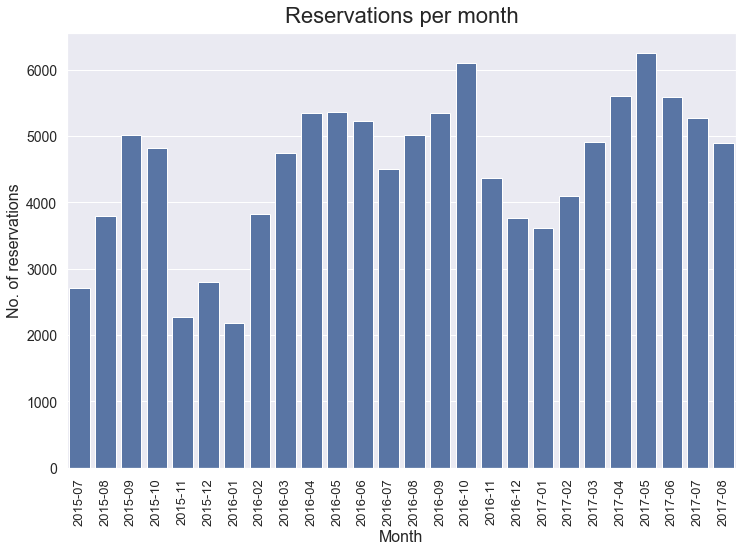

In [95]:
# Hotel reservations categorized by month
arrival_date_month = df_bookings['arrival_date'].dt.to_period('M')
count_plot(arrival_date_month, 'Reservations per month', 'No. of reservations', 'Month', (12,8))

Analyzing the visual above, it can be inferred that there tends to be an increase in reservations during the summer and fall season. There is a spike in reservations in the months Septmeber and October for the years 2015 and 2016. And for the year 2017, May and June are the most popular months. With regards to the least favored months in terms of reservations, November and December are the months with the lowest number of reservations for the years 2015 and 2016. This shows that there are less reservations in the winter when compared to summer.

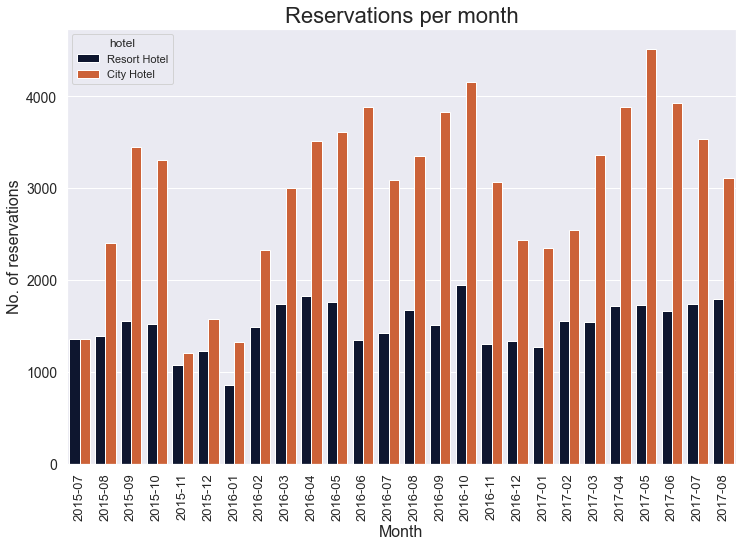

In [94]:
# Hotel reservations categorized by month classified by hotel types
arrival_date_month = df_bookings['arrival_date'].dt.to_period('M')
# base_color = sns.color_palette('terrain')[1]
sns.countplot(arrival_date_month, hue = df_bookings['hotel'], palette = sns.blend_palette(['#091334', '#e5571f'], 2))
plt.title('Reservations per month', fontsize=22)
plt.ylabel('No. of reservations', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.xticks(rotation='vertical', fontsize=13)
plt.yticks(fontsize=14)
sns.set(rc = {'figure.figsize':(12,8)})
# plt.savefig('reservations_per_year.png')
plt.show()

In the next cell, I'll explore the number of reservations by day of the month.

In [38]:
arrival_date_day = df_bookings['arrival_date'].dt.day

In [39]:
mask = arrival_date_day.value_counts().sort_index()

In [40]:
df_arrival_day =  pd.DataFrame(mask)

In [41]:
df_arrival_day['reservations_count'] = df_arrival_day.arrival_date
df_arrival_day.drop(['arrival_date'], axis=1, inplace= True)

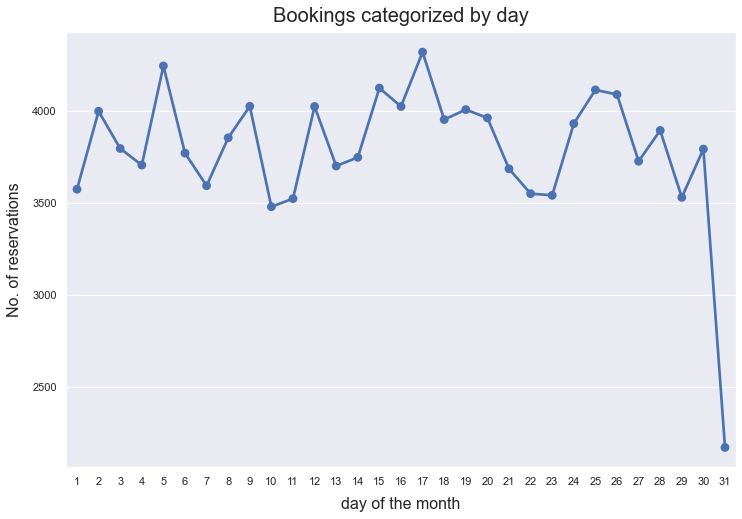

In [42]:
#bookings categorized by day
sns.pointplot(x=df_arrival_day.index, y = df_arrival_day.reservations_count);
rcParams['figure.figsize'] = 12,6
plt.title('Bookings categorized by day', fontsize=20, y=1.01)
plt.xlabel('day of the month', labelpad=10, fontsize=16)
plt.ylabel('No. of reservations', labelpad=10, fontsize=16);

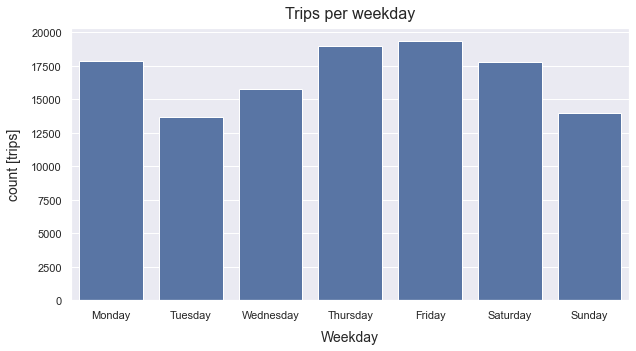

In [43]:
# Total reservations classified by weekday
rcParams['figure.figsize'] = 10,5
base_color = sns.color_palette()[0]
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df_bookings, x=df_bookings['arrival_date'].dt.day_name(), order=weekday, color=base_color)
plt.title('Trips per weekday', fontsize=16, y=1.015)
plt.xlabel('Weekday', labelpad=10, fontsize=14)
plt.ylabel('count [trips]', labelpad=10, fontsize=14);

Thursdays and Fridays are the most popular days for reservations.

Now, I'm going to look into the meal variable. Which meal package is the most popular?

There are different types of bookings with regards to meal like Undefined/SC – no meal package; BB – Bed & Breakfast, HB – Half board (breakfast and one other meal – usually dinner), FB – Full board (breakfast, lunch and dinner). I'm going to find out which one is the most common.

In [44]:
meal_types = df_bookings.meal

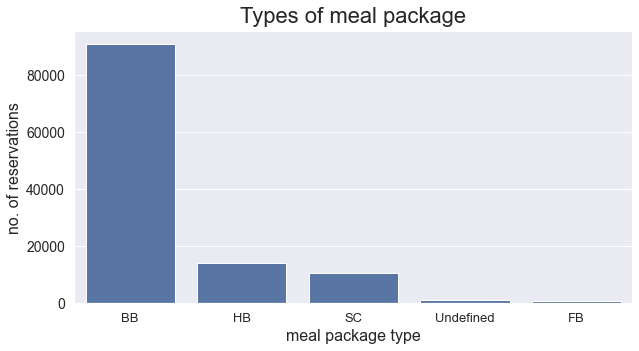

In [45]:
# reservations categorized by meal type
base_color = sns.color_palette()[0]
sns.countplot(meal_types, color = base_color, order = meal_types.value_counts().index)
plt.title('Types of meal package', fontsize=22, y=1.01)
plt.ylabel('no. of reservations', fontsize=16)
plt.xlabel('meal package type', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=14)
sns.set(rc = {'figure.figsize':(10,6)})
# plt.savefig('reservations_per_year.png')
plt.show()

BB - Bed & Breakfast is the most common type of meal package, while FB – Full board (breakfast, lunch and dinner is the least common one.

Next, I'll plot a visual depicting the different types of deposits while making the reservation.

In [46]:
df_bookings.deposit_type.value_counts()

No Deposit    102681
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

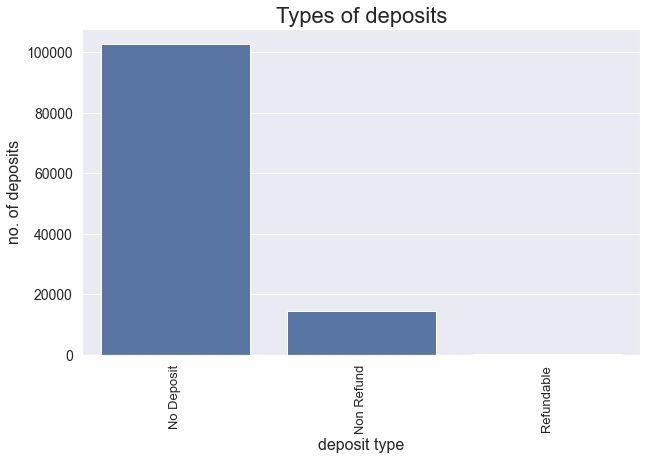

In [47]:
#plot to visualize the deposit types 
deposit_type = df_bookings.deposit_type
base_color = sns.color_palette()[0]
sns.countplot(deposit_type, color = base_color, order = deposit_type.value_counts().index)
plt.title('Types of deposits', fontsize=22)
plt.ylabel('no. of deposits', fontsize=16)
plt.xlabel('deposit type', fontsize=16)
plt.xticks(rotation='vertical', fontsize=13)
plt.yticks(fontsize=14)
sns.set(rc = {'figure.figsize':(8,6)})
# plt.savefig('reservations_per_year.png')
plt.show()

Majority of the reservations were made without any advance payment. I wonder if this will have any impact in the room allocation, meaning that if the rooms requested during booking and the actual rooms allocated are the same. Do the hotels give priority for those who have made an advance payment during room allocation? I'll have to further explore that.  

In [48]:
df_bookings_copy = df_bookings

In [49]:
df_bookings_copy['check'] = df_bookings['reserved_room_type'] == df_bookings['assigned_room_type']

In [50]:
df_bookings_copy['check'].dtype

dtype('bool')

In [51]:
df_bookings_copy['check'].replace(True, 'Yes', inplace=True)

In [52]:
df_bookings_copy['check'].replace(False, 'No', inplace=True)

In [53]:
df_bookings_copy['check'].value_counts()

Yes    103323
No      14107
Name: check, dtype: int64

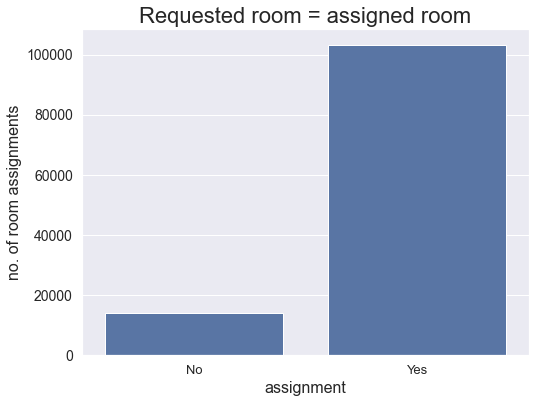

In [54]:
room_assignment = df_bookings_copy.check
base_color = sns.color_palette()[0]
sns.countplot(room_assignment, color = base_color)
plt.title('Requested room = assigned room', fontsize=22)
plt.ylabel('no. of room assignments', fontsize=16)
plt.xlabel('assignment', fontsize=16)
plt.xticks(rotation='horizontal', fontsize=13)
plt.yticks(fontsize=14)
sns.set(rc = {'figure.figsize':(8,6)})
# plt.savefig('reservations_per_year.png')
plt.show()

This shows that most of the requests for room types during reservations have been satisfied. So, deposit type hasn't impacted the room allocation significantly in this case.

In [55]:
df_bookings.average_daily_rates

2          75.00
3          75.00
4          98.00
5          98.00
6         107.00
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: average_daily_rates, Length: 117430, dtype: float64

In [56]:
df_rate = df_bookings.query('average_daily_rates < 150')

In [57]:
df_rate.shape

(100543, 26)

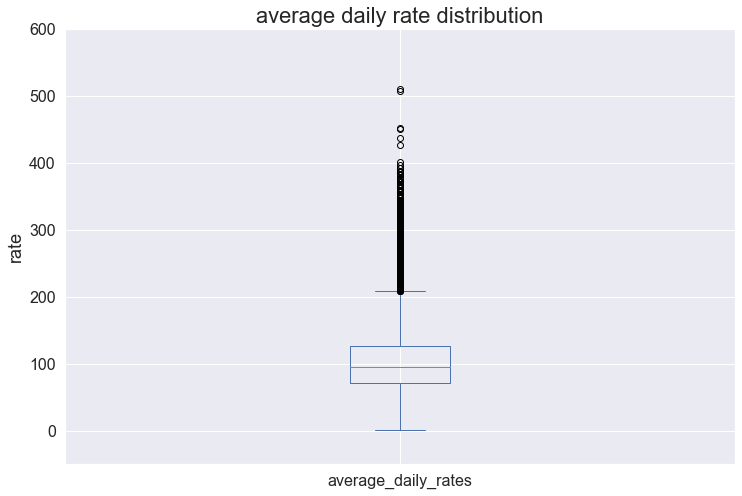

In [58]:
df_bookings.average_daily_rates.plot(kind='box', figsize=(12,8), fontsize = 16);
plt.title('average daily rate distribution', fontsize=22)
plt.ylabel('rate', fontsize=18)
plt.ylim(-50,600)
plt.show()

Rates greater than 200 can be considered as outliers.

Another thing I wanted to look into was the proportion of bookings in terms of adults only or children included reservations.

In [59]:
children_included = df_bookings.query("children > 0 or babies > 0")

In [60]:
children_included.shape

(9222, 26)

There are 9222 reservations with children included.

In [61]:
adults_only = df_bookings.query("children == 0 and babies == 0")

In [62]:
adults_only.shape

(108208, 26)

In [63]:
adults_only.shape[0] / (children_included.shape[0] + adults_only.shape[0]) * 100

92.14681086604786

There are 108,208 reservations where children aren't included. There is a huge difference between the two types of reservations. Adults only reservations makes up 92% of the overall number of reservations.

In [64]:
# initialize list of lists
data = [['adults_only', adults_only.shape[0]], ['children_included', children_included.shape[0]]]
  
# Create the pandas DataFrame
mask = pd.DataFrame(data, columns=['reservations_types', 'count']) 

In [65]:
mask

,reservations_types,count
0,adults_only,108208
1,children_included,9222


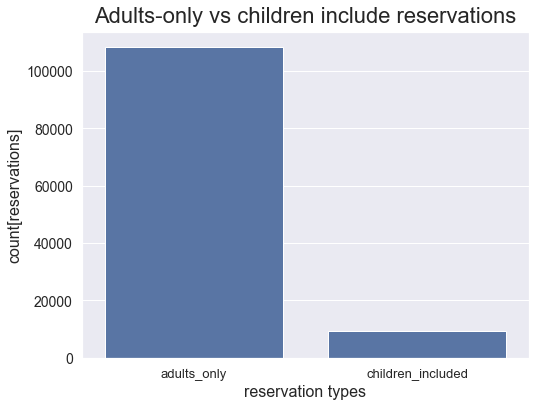

In [66]:
# adults only vs children include reservations plot
plt.figure(figsize=[8, 6])
# plt.xticks(np.arange(0, 45000, 5000))
sns.barplot(x = 'reservations_types', y = 'count', 
            data = mask,
           color = 'b')
plt.title('Adults-only vs children include reservations', fontsize=22, y=1.01)
plt.ylabel('count[reservations]', fontsize=16)
plt.xlabel('reservation types', fontsize=16)
plt.xticks(rotation='horizontal', fontsize=13)
plt.yticks(fontsize=14)
sns.set(rc = {'figure.figsize':(8,6)})

Here's a visual representaion of my earlier finding which stated that more than 90% of the reservations were adult only reservations.

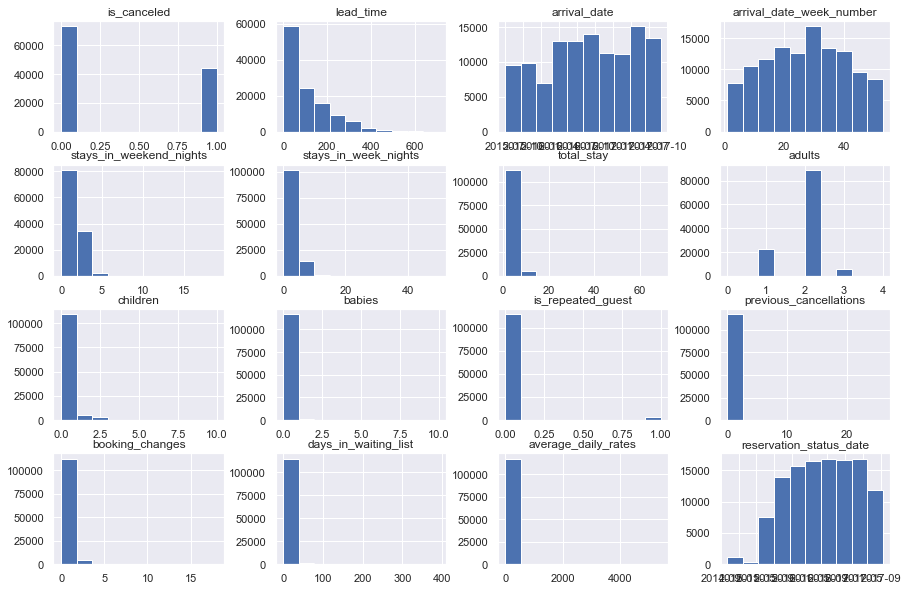

In [67]:
# histogram of the whole dataset
df_bookings.hist(figsize=(15,10));

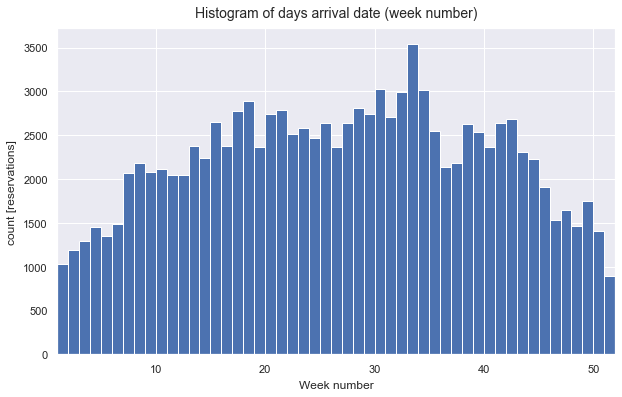

In [68]:
# Plot a histogram of arrival_date_week_number
plt.figure(figsize=[10, 6])
bins = np.arange(0, df_bookings['arrival_date_week_number'].max()+0.2, 1)
plt.hist(data = df_bookings, x = 'arrival_date_week_number', bins = bins);
plt.title('Histogram of days arrival date (week number)', fontsize=14, y=1.015)
plt.xlim(1,52)
plt.xlabel('Week number', labelpad=6, fontsize=12)
plt.ylabel('count [reservations]', labelpad=6, fontsize=12)
plt.show()

The distribution is close to normal.

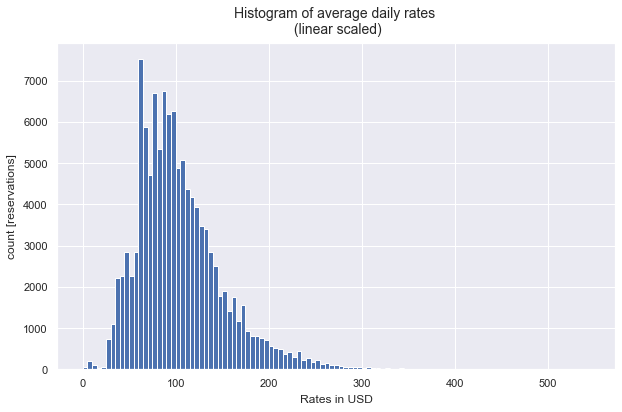

In [69]:
# Plot a histogram of average daily rates
plt.figure(figsize=[10, 6])
base_color = sns.color_palette()[0]
bins = np.arange(0, 550, 5)
plt.hist(data = df_bookings, x = 'average_daily_rates', bins = bins, color = base_color);
plt.title('Histogram of average daily rates \n (linear scaled)', fontsize=14, y=1.01)
plt.xlabel('Rates in USD', labelpad=6, fontsize=12)
plt.ylabel('count [reservations]', labelpad=6, fontsize=12)
plt.show()

The distribution for total days in waiting is right skewed as you can see. Majority of the values for days in waiting list is concentrated between 50 and 150.

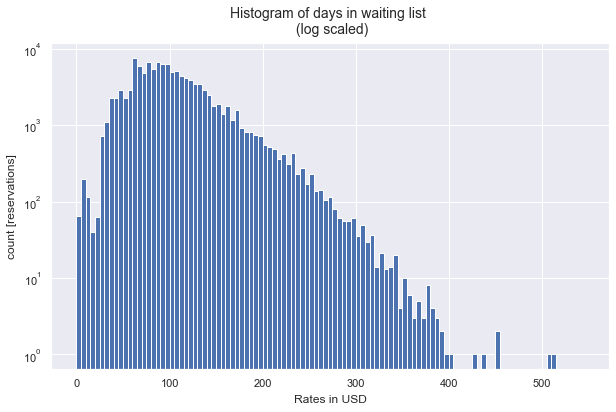

In [70]:
# Plot a log scaled histogram of average daily rates
plt.figure(figsize=[10, 6])
base_color = sns.color_palette()[0]
bins = np.arange(0, 550, 5)
plt.hist(data = df_bookings, x = 'average_daily_rates', bins = bins, color = base_color, log= True);
plt.title('Histogram of days in waiting list \n (log scaled)', fontsize=14, y=1.01)
plt.xlabel('Rates in USD', labelpad=6, fontsize=12)
plt.ylabel('count [reservations]', labelpad=6, fontsize=12)
plt.show()

Distribution isn't as heavily right-skewed as before.

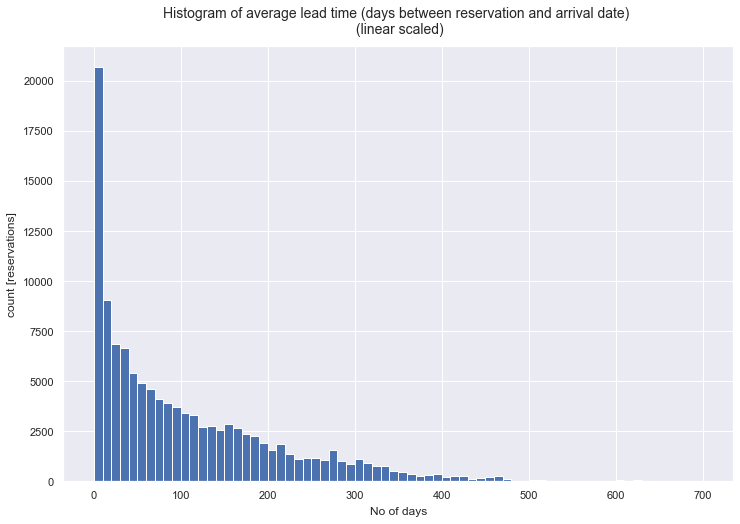

In [71]:
# Plot a histogram of the "lead_time" column
plt.figure(figsize=[12, 8])
bins = np.arange(0, df_bookings['lead_time'].max()+0.2, 10)
plt.hist(data = df_bookings, x = 'lead_time', bins = bins);
plt.title('Histogram of average lead time (days between reservation and arrival date) \n (linear scaled)', fontsize=14, y=1.015)
plt.xlabel('No of days', labelpad=6, fontsize=12)
plt.ylabel('count [reservations]', labelpad=6, fontsize=12)
plt.show()

The distribution for lead_time (days between reservation date and arrival date) is heavily right skewed.

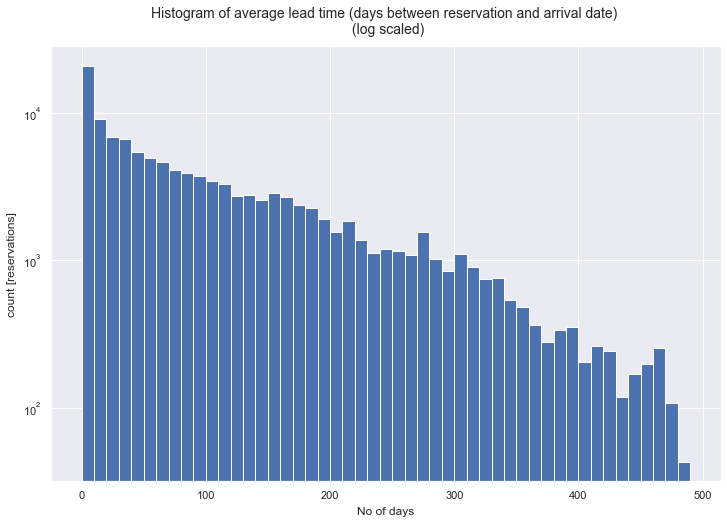

In [72]:
# Plot a log-scaled histogram of the "lead_time" column
plt.figure(figsize=[12, 8])
bins = np.arange(0, 500, 10)
plt.hist(data = df_bookings, x = 'lead_time', bins = bins, log=True);
plt.title('Histogram of average lead time (days between reservation and arrival date) \n (log scaled)', fontsize=14, y=1.015)
plt.xlabel('No of days', labelpad=6, fontsize=12)
plt.ylabel('count [reservations]', labelpad=6, fontsize=12)
plt.show()

The log-scaled distribution is a little better than the previous one to normal but still slightly right-skewed.

Next, I'm going to look into the nationalities with the most number of reservations.

In [73]:
df_top_10_countries = df_bookings.country.value_counts().head(10).rename_axis('country').reset_index(name='reservations_count')

In [74]:
new_values = {'PRT': 'Portugal', 'GBR': 'Great Britain', 
      'FRA': 'France', 'ESP': 'Spain', 
      'DEU': 'Germany', 'ITA': 'Italy',
      'IRL': 'Ireland', 'BEL': 'Belgium',
      'BRA': 'Brazil', 'NLD': 'Netherlands'}

df_top_10_countries.replace({"country": new_values}, inplace = True)

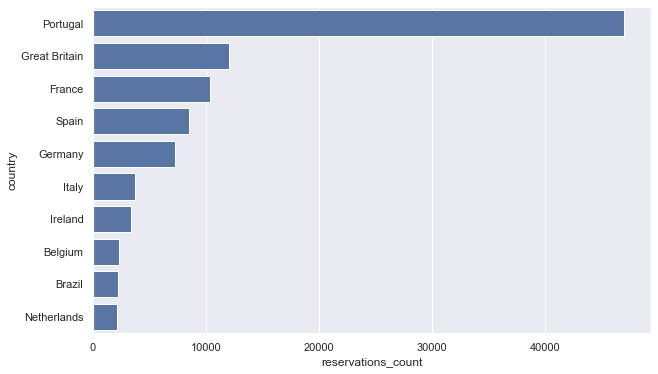

In [97]:
# Top 10 reservation origin countries
plt.figure(figsize=[10, 6])
# plt.xticks(np.arange(0, 45000, 5000))
sns.barplot(y ='country', x = 'reservations_count', 
            data = df_top_10_countries,
           color = 'b');

We can see that portugese nationals are the ones with the most number of reservations followed by Great Britain and France.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I tried to plot a histogram for the arrival_date_week_number which was the week in which the guests arrived at the hotel. The distribution was close to normal. However, the histogram for the variables 'average_daily_rates' and 'lead-time' were quite right skewed. I re-plotted a log-scaled version of the right-skewed histograms and they weren't as right-skewed as before but still not normal. As far as the insights are concerned I was able to find out that there tends to be an increase in reservations during the summer and fall season. Another thing I was curious to have to the answer to was how likely were the guests to be assigned the room they requested during booking. 88% of the guests had their requests satisfied where they were assigned the rooms they requested. With regards to nationalities of the guests, Portugese nationals were the ones with most number of reservations followed by Great Britain and France. I also attempted to explore the bookings in terms of meal package selected. BB - Bed & Breakfast was the most common type of meal package, while FB – Full board (breakfast, lunch and dinner was the least common one.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> For the most part, I converted columns into the correct data type. I converted the date columns into the datetime and merged them into a single column (arrival_date). For readability purpose, I rename 'adr' variable into 'average_daily_rates'. I also added a new variable called 'total_stay' which is the combination of 'stays_in_weekend_nights' and 'stays_in_week_nights' variables. This enabled me to find out the total length of stay for each reservations. I then proceeded to get rid of negative values for average daily rates and dropped the columns that were insignificant for my analysis.

## Bivariate Exploration

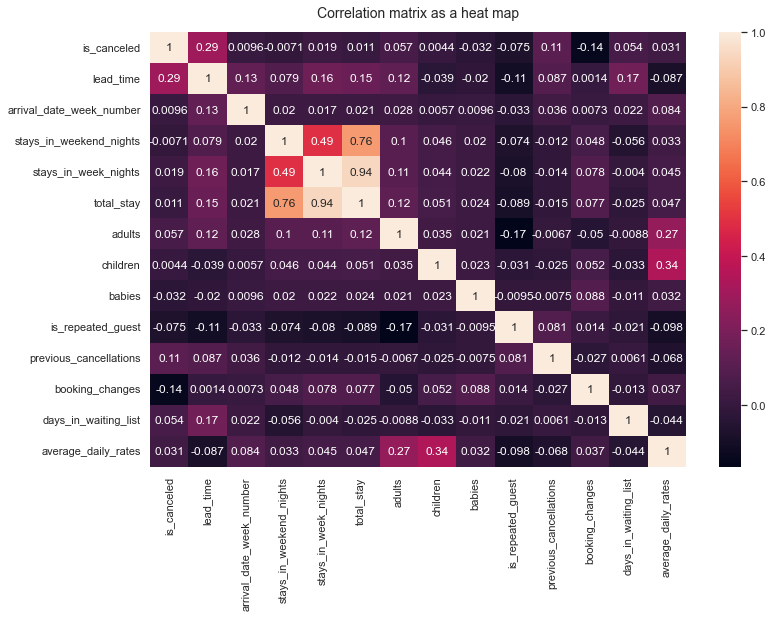

In [76]:
# Heat map of the whole dataset to identify any correlations
corr_df = df_bookings.corr()
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(corr_df, annot=True)
plt.title('Correlation matrix as a heat map', fontsize=14, y=1.02)
plt.show()

In [77]:
df_bookings['total_stay'].corr(df_bookings['average_daily_rates'])

0.046900400279081635

As you can see, there is a very weak correlation between the length of stay and the average daily rates.

## Hotel rate vs length of stay

The bivariate exploration done on these two variables indicated that there was a very weak correlation between the length of stay and the average daily rates. The rates had close to no effect in the length of stay. Additional analysis done also supported the earlier finding where there was close to zero correlation between hotel rate and length of stay in both city and resort hotels.


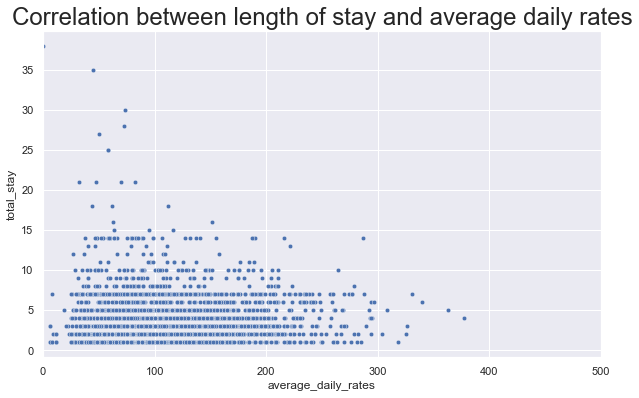

In [116]:
# Correlation between length of stay and average daily rates
plt.figure(figsize=[10, 6])
plt.title('Correlation between length of stay and average daily rates', fontsize = 24)
sns.scatterplot(y = 'total_stay', x = 'average_daily_rates', data = df_bookings.sample(5000), s=20);
plt.xlim(0,500)
# sns.set(font_scale = 1)
# plt.savefig('length_of_stay_and_rates_correlation.png')
plt.show()

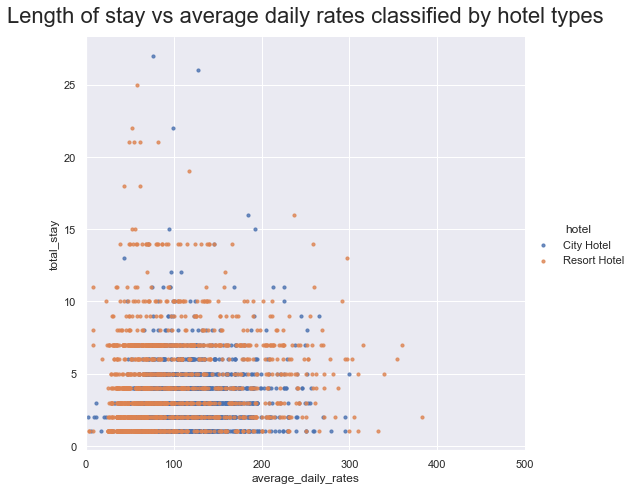

In [115]:
# plt.figure(figsize=[15, 8])
g = sns.FacetGrid(data = df_bookings.sample(5000), hue = 'hotel', size=7)
plt.xlim(0,500)
plt.title('Length of stay vs average daily rates classified by hotel types', fontsize = 22, y=1.02);
g.map(plt.scatter, 'average_daily_rates', 'total_stay', s=10, alpha=0.8)
g.add_legend();

There is no positive correlation nor negative correlation between length of stay and the average daily rate.

In the next cells, I'm going to further explore the monthly reservation. I'm planning to visualize the monthly reservations based on hotel types

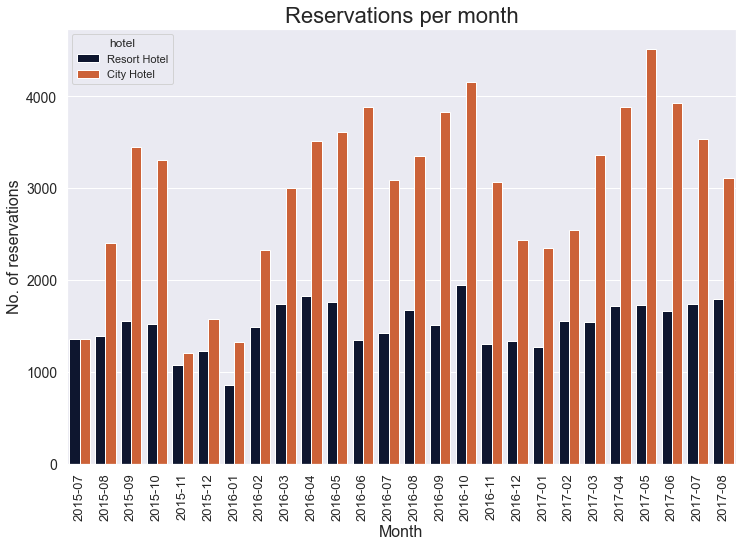

In [113]:
# Hotel reservations categorized by month classified by hotel types
arrival_date_month = df_bookings['arrival_date'].dt.to_period('M')
# base_color = sns.color_palette('terrain')[1]
sns.countplot(arrival_date_month, hue = df_bookings['hotel'], palette = sns.blend_palette(['#091334', '#e5571f'], 2))
plt.title('Reservations per month', fontsize=22)
plt.ylabel('No. of reservations', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.xticks(rotation='vertical', fontsize=13)
plt.yticks(fontsize=14)
sns.set(rc = {'figure.figsize':(12,8)})
# plt.savefig('reservations_per_year.png')
plt.show()

The first thing to notice is that there is a gradual increase in reservation through out the years with a slight dip towards mid 2017. Overall, there are more reservations for city hotels than resort hotels.

Next, I'd like to check analyze yearly reservation in relation with customer types.

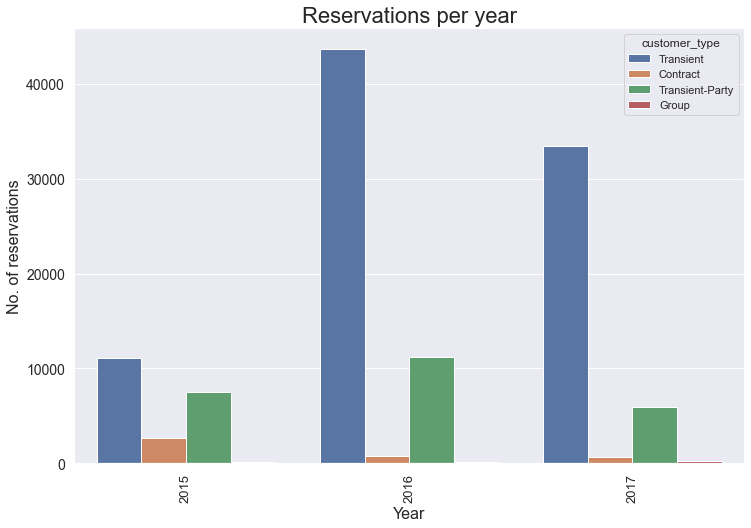

In [81]:
# Hotel reservations categorized by year and classified by customer types
arrival_date_year = df_bookings['arrival_date'].dt.year
# base_color = sns.color_palette()[1]
sns.countplot(arrival_date_year, hue = df_bookings['customer_type'])
plt.title('Reservations per year', fontsize=22)
plt.ylabel('No. of reservations', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.xticks(rotation='vertical', fontsize=13)
plt.yticks(fontsize=14)
sns.set(rc = {'figure.figsize':(8,6)})
# plt.savefig('reservations_per_year.png')
plt.show()

Most reservations are for the customer type of Transient which is when the booking is not part of a group or contract, and is not associated to other transient booking. Second most common customer is Transient party which is when the booking is transient, but is associated to at least other transient booking.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I was able to find out that there was a very weak correlation between the length of stay and the average daily rates. The rates had close to no effect in the length of stay. I also found that there was a gradual increase in reservation throughout the years with a slight dip towards mid 2017. City hotel reservations made up larger share of the reservations.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I tried to look into yearly reservations based on the customer types. I found out that Transient (customer type) was the most common type of customers in all the 3 years. Another variable I tried exploring was what percentage of customers were returning. Only 2.8% of the guests were returning ones. I also was curious to see the proportion of adults only bookings and bookings with children included. 90% of the reservations were adults only. 

## Multivariate Exploration

I'll plot a pairGrid to identify any interesting relationships between the non categorical variables.

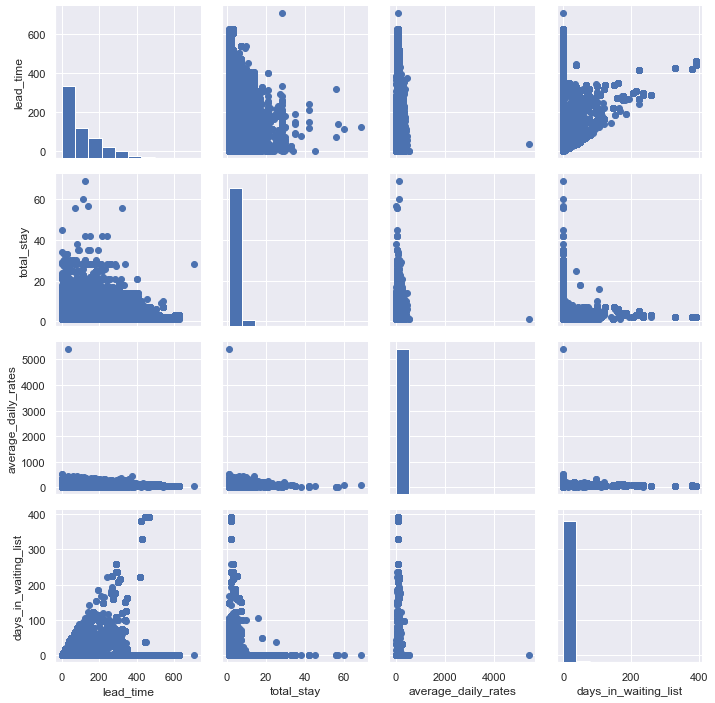

In [82]:
g = sns.PairGrid(data = df_bookings, vars = ['lead_time', 'total_stay', 'average_daily_rates', 'days_in_waiting_list'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

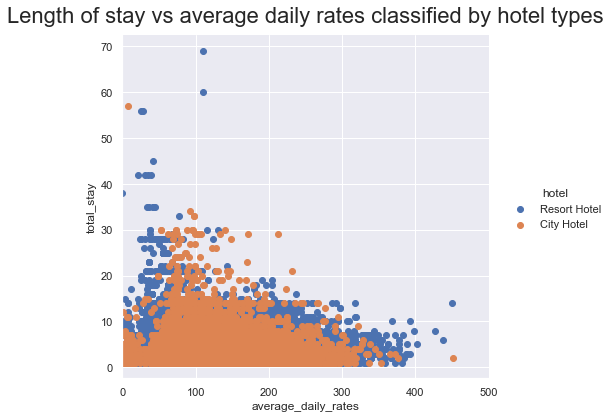

In [83]:
g = sns.FacetGrid(data = df_bookings, hue = 'hotel', size=6)
plt.xlim(0,500)
plt.title('Length of stay vs average daily rates classified by hotel types', fontsize = 22, y=1.02)
g.map(plt.scatter, 'average_daily_rates', 'total_stay')
g.add_legend();

## Length of stay categorized by means of reservation

Customers that booked their reservations through Offline travel agents and tour operators stayed longer. On average, these customers stayed for 6 days. Guests that made the reservations themselves stayed only have as much which was around 3 days on average. 

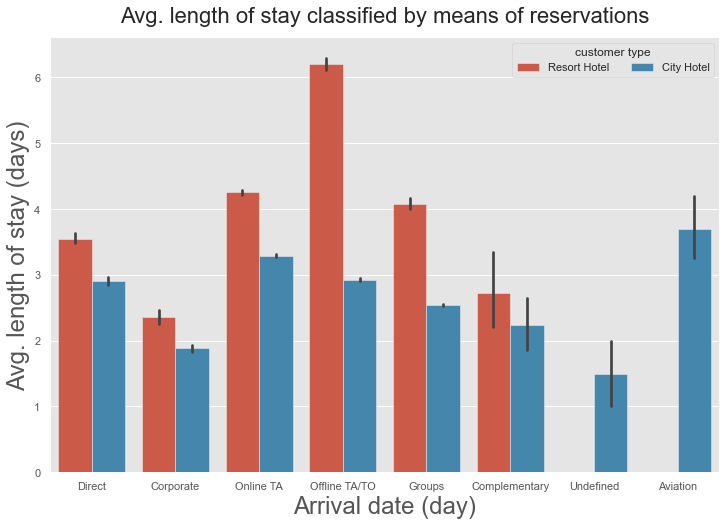

In [150]:
plt.figure(figsize = [12,8])
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = sns.barplot(data = df_bookings, x = 'market_segment', y = 'total_stay', hue = 'hotel')
ax.legend(loc = 1, ncol = 2, framealpha = 1, title = 'customer type')
# plt.legend(loc='upper center')
plt.title('Avg. length of stay classified by means of reservations', fontsize = 22, y=1.02)
plt.xlabel('Arrival date (day)')
plt.ylabel('Avg. length of stay (days)');

As you can see from the visual above, customers that booked their reservations through Offline travel agents and tour operators stayed longer. On average, these customers stayed for 6 days. Guests that made the reservations themselves stayed only half as much which was around 3 days on average. 

## Length of stay classified by hotel and customer types

In resort hotels, contract customer types tended to stay twice as long as compared to other customer types. However, in city hotels, Transient customers slightly stayed longer than the other types.

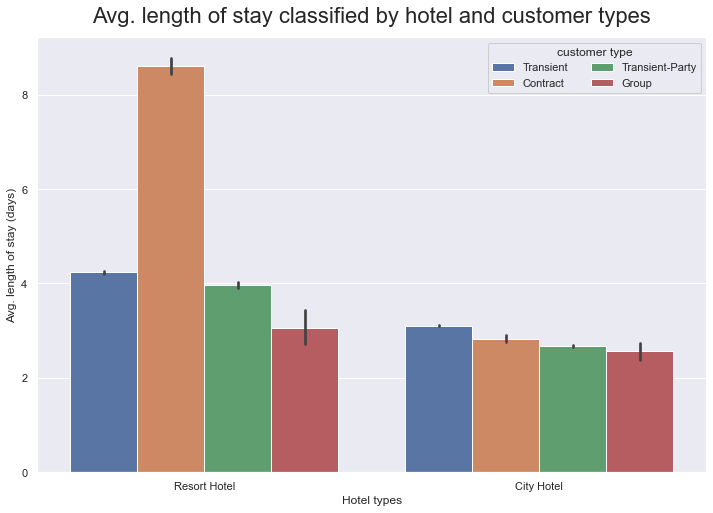

In [111]:
ax = sns.barplot(data = df_bookings, x = 'hotel', y = 'total_stay', hue = 'customer_type')
ax.legend(loc = 1, ncol = 2, framealpha = 1, title = 'customer type')
ax.legend(loc = 1, ncol = 2, framealpha = 1, title = 'customer type')
plt.title('Avg. length of stay classified by hotel and customer types', fontsize = 22, y=1.02)
plt.xlabel('Hotel types')
plt.ylabel('Avg. length of stay (days)');

Contract customer types tend to stay twice as long as compared to other customer types in resort hotels. For city hotels, Transient customers slightly stay longer than the other types.

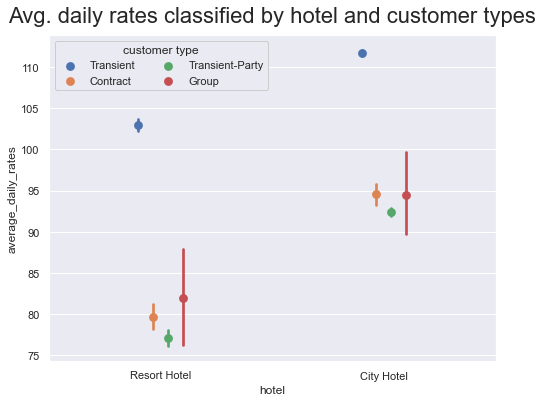

In [86]:
ax = sns.pointplot(data = df_bookings, x = 'hotel', y = 'average_daily_rates', hue = 'customer_type',
                  dodge = 0.2, linestyles = "")
plt.title('Avg. daily rates classified by hotel and customer types', fontsize = 22, y=1.02)
ax.legend(loc = 2, ncol = 2, framealpha = 1, title = 'customer type'); 

As far as the average daily rates are concerned, Transient customers spent more than the other customer types in both types of the hotel while transient-party customer types spent the least amount.

## Countries with the most number of guests

With regards to nationalities of the guests, around 85% of the reservations were made by the top 10 countries depicted in the visual below. Of these countries, Portugese nationals were the ones with most number of reservations followed by Great Britain and France. 

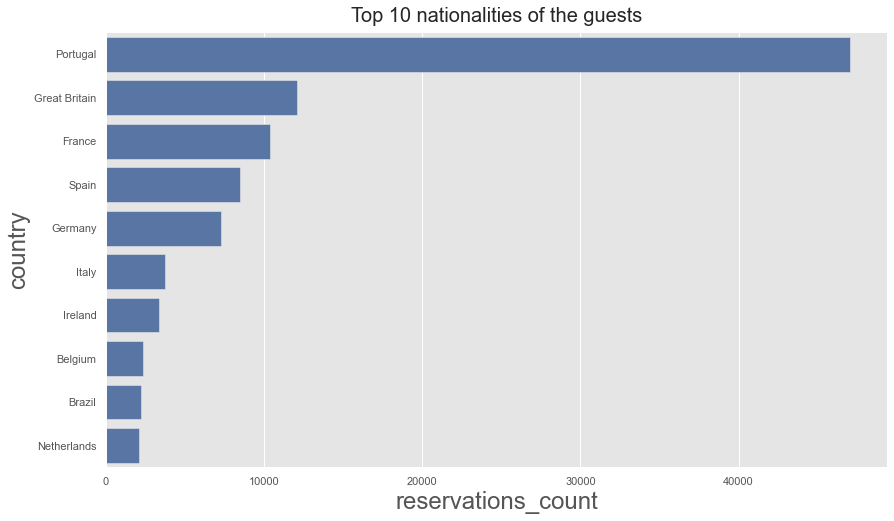

In [140]:
# Top 10 reservation origin countries
plt.figure(figsize=[14, 8])
plt.title('Top 10 nationalities of the guests', fontsize=20, y=1.01)
# plt.xticks(np.arange(0, 45000, 5000))
sns.barplot(y ='country', x = 'reservations_count', 
            data = df_top_10_countries,
           color = 'b');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Analyzing the the average length of stay per weekday, I found the average length of stay tends to be more in resort hotels than city hotels. Following a further exploration, Contract customer types stayed twice as long as compared to other customer types in resort hotels. For city hotels, Transient customers slightly stay longer than the other types. Finally, regarding average daily rates, Transient customers spent more than the other customer types in both types of the hotel while transient-party customer types spent the least amount.

### Were there any interesting or surprising interactions between features?

> I was surprised to find that the average length of stay was more in resort hotels compared to city hotels. The reason is due to resort hotel reservations making up only 1/3 of the whole dataset. This may be due to resort hotels being the preferred destinations for vacation stays while city hotels are usually preferred for business stays or shorter vacation stays.

## Conclusions

> The objective of this project was to conduct an exploratory data analysis on a dataset containing booking information for a city hotel and a resort hotel. Various characteristics of the bookings such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things are included in the data. Univariate, bivariate and multivariate relationships of the variables were explored and visualized using different plotting techniques.

> The initial phase of the analysis task was to wrangle and clean the dataset. I used a custom dataset which I stated above and performed some cleaning operations like converting columns into the correct data types. I converted the date columns into their correct format whcih is the datetime datatype. I also added a new variable called 'total_stay' which is the combination of 'stays_in_weekend_nights' and 'stays_in_week_nights' variables. This new variable eased the task of calculating the toal length of stay.

> After the completion of the data wrangling, I proceeded to explore the univariate relationships. I found that there tended to be an increase in reservations during the summer and fall season. I also tried to explore the likelihood of guest getting assigned their requested rooms. 88% of the guests had their requests satisfied. Another question I tried to answer was the most popular origin country of the guests. Portugese nationals made the most number of reservations followed by Great Britain and France.

> The next phase was the bivariate exploration. I was able to find out that there was a very weak correlation between the length of stay and the average daily rates. The rates had close to no effect in the length of stay. I also found that there was a gradual increase in reservation throughout the years with a slight dip towards mid 2017. City hotel reservations made up larger share of the reservations.

> Finally, multivariate exploration was done where I found that the average length of stay was higher in resort hotels. Further analyzing the data using multiple vairiables, it was apparent that contract customer types stayed twice as long as compared to other customer types in resort hotels. For city hotels, Transient customers slightly stay longer than the other types. I also attempted to perform a detailed analysis on the average daily rates variable. Transient customers spent more than the other customer types in both types of the hotel while transient-party customer types spent the least amount.


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [87]:
# !pip install -U nbconvert==5.6.1 --user

In [2]:
!jupyter nbconvert hotel_bookings_slide.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook hotel_bookings_slide.ipynb to slides
[NbConvertApp] Writing 922118 bytes to hotel_bookings_slide.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\keenj\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\keenj\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\keenj\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\keenj\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\keenj\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  Fi